# Experimenting with different random distribuitions

In [1]:
%matplotlib inline

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Default stype
plt.style.use('grayscale')
plt.rc('figure', facecolor='white')

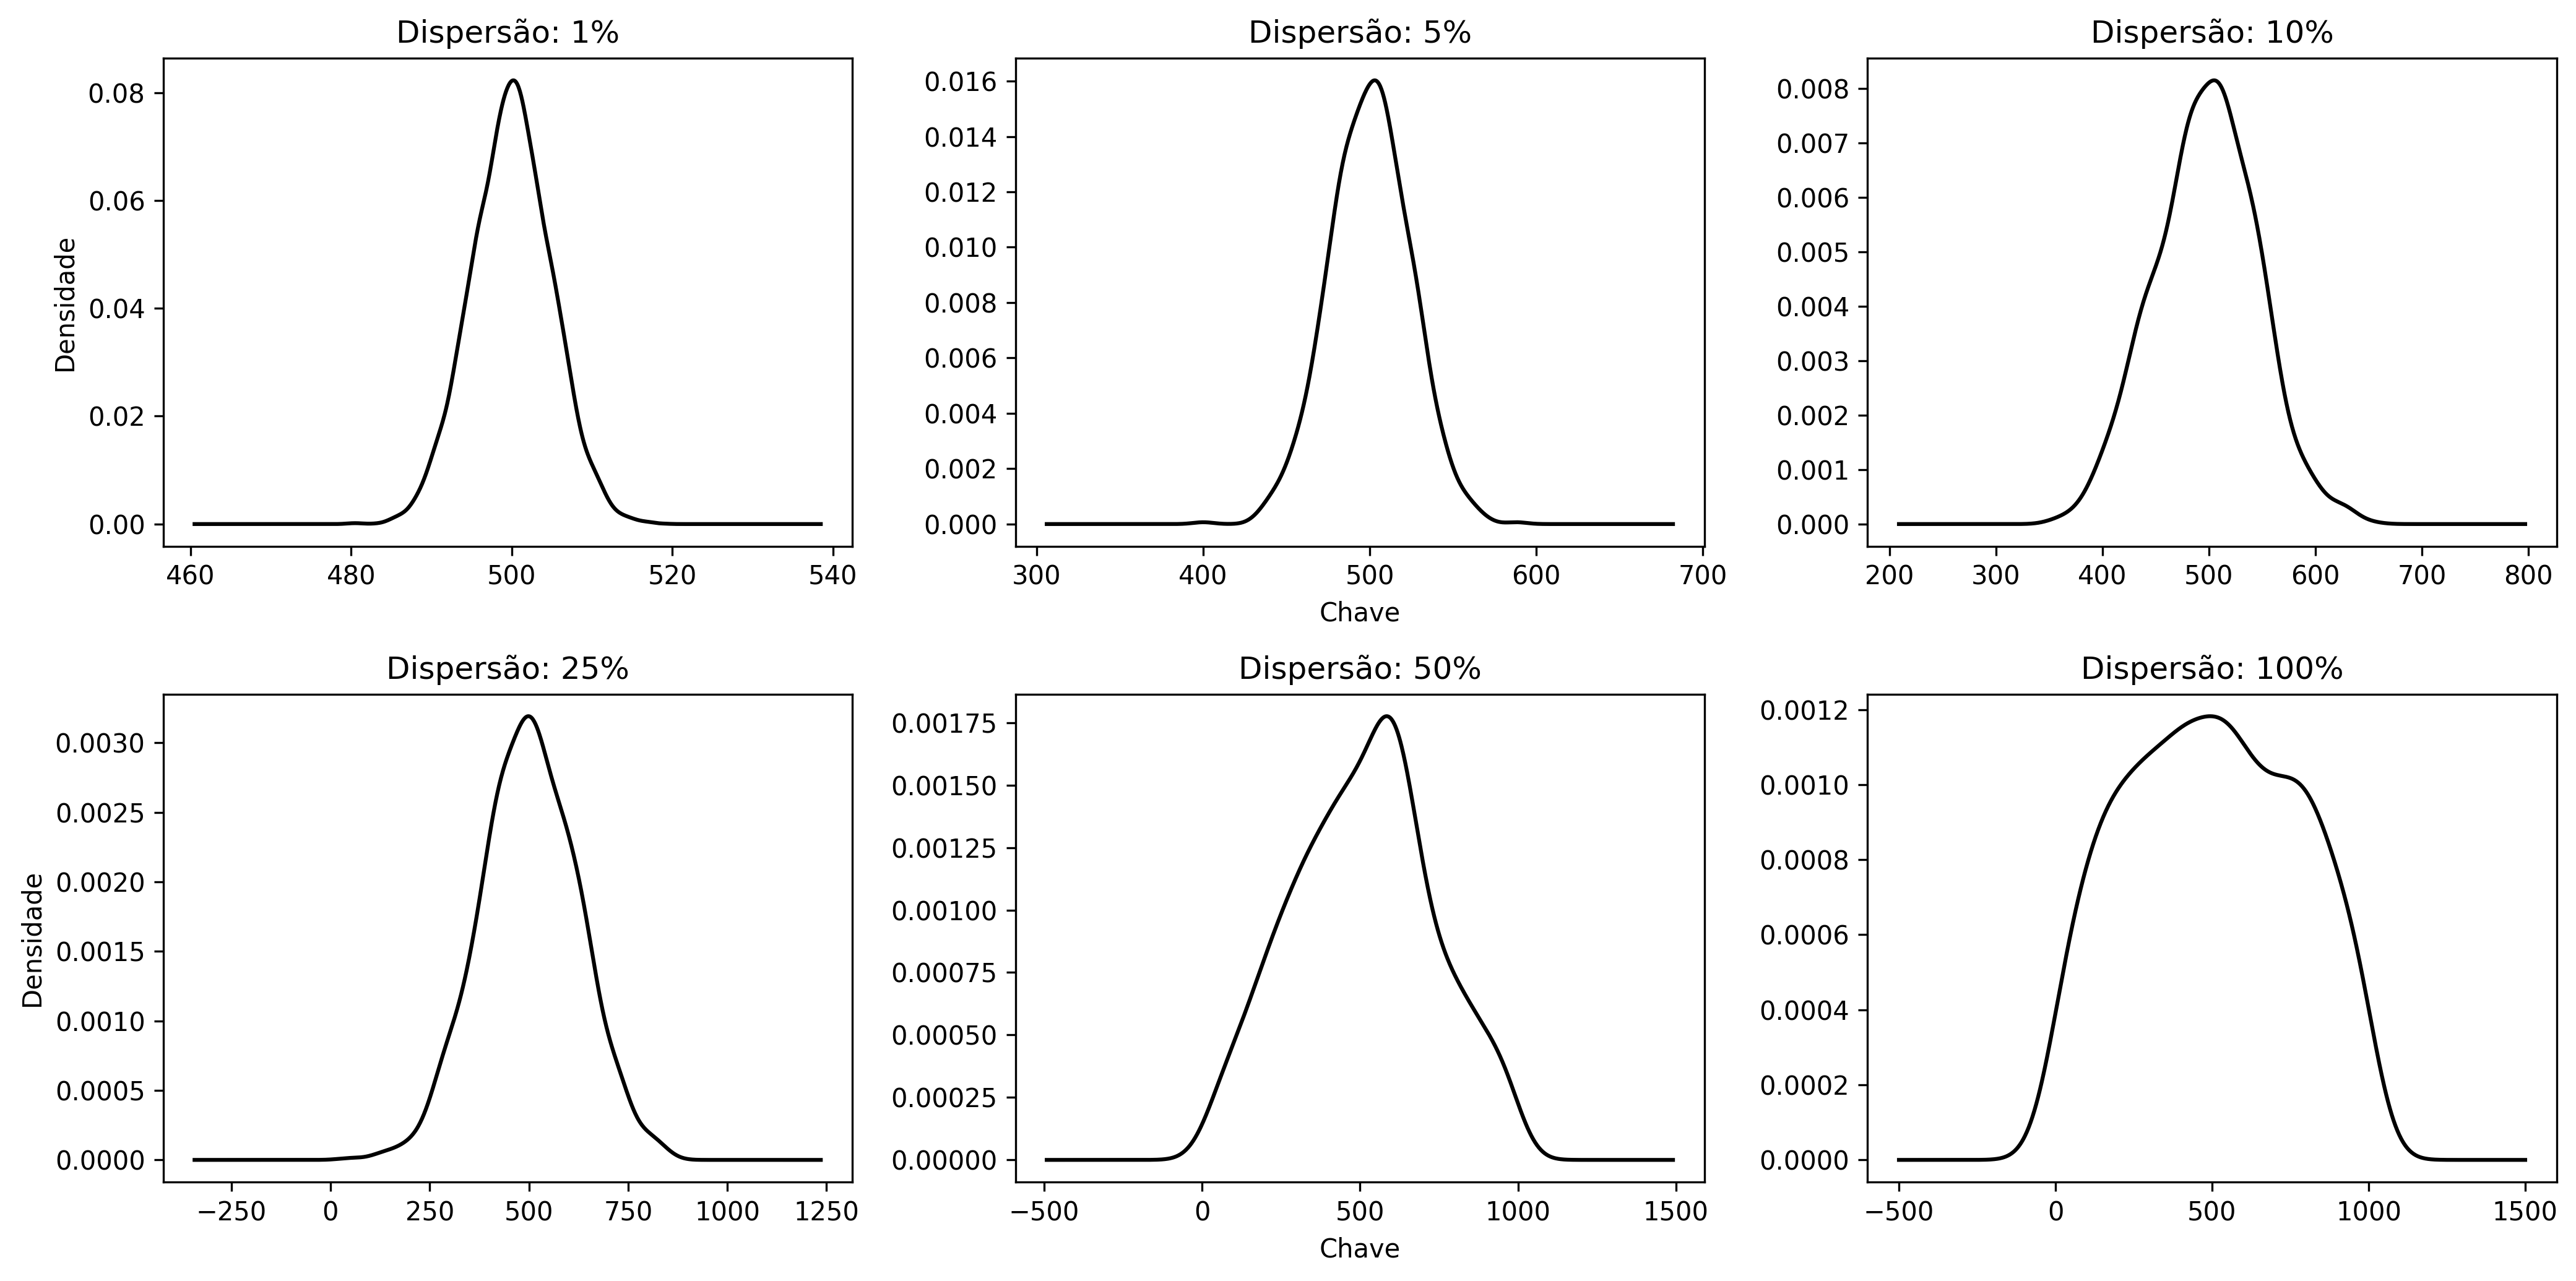

In [5]:
def gen(sd, maxkey, size):
    for i in range(size):
        num = -1
        while num < 0 or num > maxkey:
            num = round(random.gauss(0, 1) * ((maxkey/2)*sd) + (maxkey/2))
        yield num

fig, ((tl, tm, tr), (bl, bm, br)) = plt.subplots(nrows=2, ncols=3, figsize=(14,7), dpi=300)
pd.Series(gen(0.01, 1000, 10000)).plot.kde(ax=tl, title="Dispersão: 1%").set_ylabel("Densidade")
pd.Series(gen(0.05, 1000, 1000)).plot.kde(ax=tm, title="Dispersão: 5%").set_ylabel(None)
pd.Series(gen(0.1, 1000, 1000)).plot.kde(ax=tr, title="Dispersão: 10%").set_ylabel(None)
pd.Series(gen(0.25, 1000, 1000)).plot.kde(ax=bl, title="Dispersão: 25%").set_ylabel("Densidade")
pd.Series(gen(0.50, 1000, 1000)).plot.kde(ax=bm, title="Dispersão: 50%").set_ylabel(None)
pd.Series(gen(1, 1000, 1000)).plot.kde(ax=br, title="Dispersão: 100%").set_ylabel(None)
tm.set_xlabel("Chave")
bm.set_xlabel("Chave")
fig.tight_layout()